In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string


In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
stopword = set(stopwords.words("english"))

In [ ]:
df= pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
df['labels']= df['class'].map({0:"hate speech detected", 1:"offensive language detected", 3:"no hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  offensive language detected  
2  offensive language detected  
3  offensive language detected  
4  offensive language detected  


In [ ]:
df= df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language detected


In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-76-bf934754a5b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.dropna()

,tweet,labels
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language detected
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",offensive language detected
...,...,...
24776,you're all niggers,hate speech detected
24777,you're such a retard i hope you get type 2 dia...,hate speech detected
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language detected
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language detected


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [ ]:
df['tweet']=df['tweet'].apply(clean)

In [ ]:
df=df.replace([np.inf, -np.inf], np.nan).dropna() 

In [ ]:
df.head()

,tweet,labels
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive language detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive language detected
3,rt cganderson vivabas look like tranni,offensive language detected
4,rt shenikarobert shit hear might true might f...,offensive language detected
5,tmadisonx shit blow meclaim faith somebodi sti...,offensive language detected


In [ ]:
df.isnull().sum()

tweet     0
labels    0
dtype: int64

In [ ]:
x= np.array(df['tweet'])
y= np.array(df['labels'])
cv= CountVectorizer()            

In [ ]:
x=cv.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state= 42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
test_data= "i will kill that man"
df =cv.transform([test_data]).toarray()
print(clf.predict(df))

['hate speech detected']


In [ ]:
test_data= "I don't like that person"
df =cv.transform([test_data]).toarray()
print(clf.predict(df))

['offensive language detected']


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
prediction = clf.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.96%


In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [ ]:
prediction = classifier.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.7%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators = 100)  



In [ ]:
clfr.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
prediction = clfr.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.71%


In [ ]:
from sklearn.naive_bayes import GaussianNB
import scipy as sp
model = GaussianNB()
# x_train= x_train.toarray()
x_test = x_test.todense()
# x_test= x_test.toarray()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
x_test = np.asarray(x_test)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 65.73%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
prediction = knn.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.98%


In [ ]:
from sklearn.svm import SVC  
clfsvm = SVC(kernel='linear') 
clfsvm.fit(x_train, y_train) 

SVC(kernel='linear')

In [ ]:
prediction = clfsvm.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.98%


In [ ]:
from sklearn.metrics import confusion_matrix

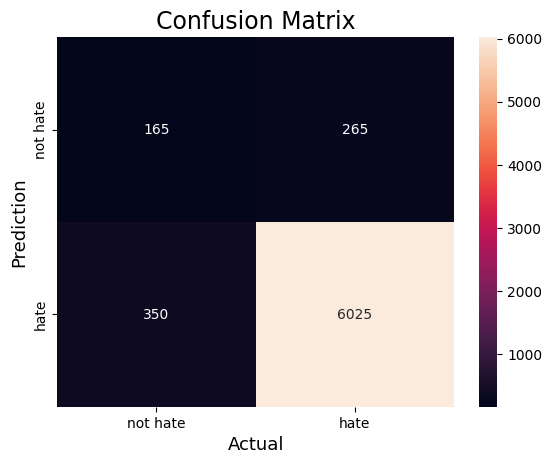

In [ ]:
# compute the confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['not hate', 'hate'],
            yticklabels=['not hate', 'hate'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()